<a href="https://colab.research.google.com/github/rodrigopbbr/mineracao_de_dados/blob/main/Preprocessamento_com_PCA_no_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="https://github.com/storopoli/ciencia-de-dados/blob/master/notebooks/images/titanic.png?raw=1" alt="titanic" style="width: 500px;"/>

In [ ]:
# import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
titanic = sns.load_dataset('titanic')





In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})



In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


#Correlação entre os atributos

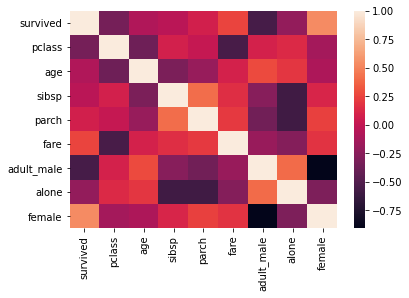

In [ ]:
sns.heatmap(titanic.corr(), 
            xticklabels=titanic.corr().columns.values,
            yticklabels=titanic.corr().columns.values)

# Scatter Plot

In [ ]:
scatterplot1 = px.scatter(titanic,x='fare',y='class')
scatterplot1.show()

#Matrix de Correlação

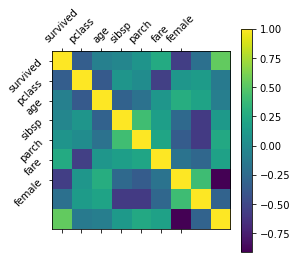

In [ ]:
# Correlation matrix
plt.matshow(titanic.corr())
continuous_features = titanic.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.colorbar()
plt.show()

#Selecionando uns atibutos

In [ ]:
feature_names = ['pclass', 'female', 'age', 'fare']

feature_names 

['pclass', 'female', 'age', 'fare']

In [ ]:
X = titanic[feature_names].to_numpy()
titanic[feature_names]

In [ ]:
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714
titanic[feature_names]

In [ ]:
y = titanic['survived'].to_numpy()

# histograma da feature

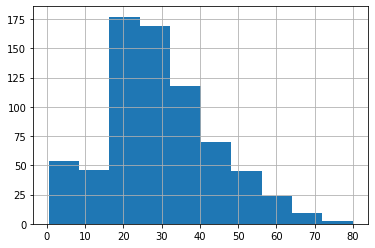

In [ ]:
titanic['age'].hist()

#Transformando os dados

In [ ]:
# Unique values
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Grouping
survived_group = titanic.groupby('survived')
survived_group.mean()

,pclass,age,sibsp,parch,fare,adult_male,alone,female
survived,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239,0.147541
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608,0.681287


In [ ]:
# Rows with at least one NaN value
titanic[pd.isnull(titanic).any(axis=1)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0


In [ ]:
# Drop rows with Nan values
titanic = titanic.dropna() # removes rows with any NaN values
#titanic = titanic.reset_index() # reset's row indexes in case any rows were dropped
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1


In [ ]:
# Unique values
titanic['deck'].unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [ ]:
# Transforming deck into int value column
titanic['level'] = titanic['deck'].map({'C': 0, 'E': 1, 'G': 2, 'D': 3, 'A': 4, 'B': 5, 'F': 6})
titanic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female,level
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1,2
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1,0


In [ ]:
# Dropping multiple columns
titanic = titanic.drop(['alive', 'embark_town', 'deck'], axis=1) # we won't use text features for our initial basic models
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,level
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False,1,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,True,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,False,1,2
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,True,1,0


In [ ]:
# Map feature values
titanic['sex'] = titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['embarked'] = titanic['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,level
1,1,1,0,38.0,1,0,71.2833,1,First,woman,False,False,1,0
3,1,1,0,35.0,1,0,53.1000,0,First,woman,False,False,1,0
6,0,1,1,54.0,0,0,51.8625,0,First,man,True,True,0,1
10,1,3,0,4.0,1,1,16.7000,0,Third,child,False,False,1,2
11,1,1,0,58.0,0,0,26.5500,0,First,woman,False,True,1,0


In [ ]:
titanic['class'].unique()

['First', 'Third', 'Second']
Categories (3, object): ['First', 'Third', 'Second']

In [ ]:
titanic['who'].unique()

array(['woman', 'man', 'child'], dtype=object)

In [ ]:
titanic['alone'].unique()

array([False,  True])

In [ ]:
# Map feature values
titanic['classed'] = titanic['class'].map( {'First': 1, 'Second': 2, 'Third': 3 } ).astype(int)
titanic['who'] = titanic['who'].map( {'woman': 0, 'man': 1, 'child': 2 } ).astype(int)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,level,classed
1,1,1,0,38.0,1,0,71.2833,1,First,0,False,False,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,First,0,False,False,1,0,1
6,0,1,1,54.0,0,0,51.8625,0,First,1,True,True,0,1,1
10,1,3,0,4.0,1,1,16.7000,0,Third,2,False,False,1,2,3
11,1,1,0,58.0,0,0,26.5500,0,First,0,False,True,1,0,1


#somente atributos continuos

In [ ]:
continuous_features = titanic.describe().columns
continuous_features

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'female', 'classed'],
      dtype='object')

#PCA

In [ ]:
X_titanic = titanic[continuous_features]
X_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,female,classed
1,1,1,0,38.0,1,0,71.2833,1,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,1
6,0,1,1,54.0,0,0,51.8625,0,1,0,1
10,1,3,0,4.0,1,1,16.7000,0,2,1,3
11,1,1,0,58.0,0,0,26.5500,0,0,1,1


#Normalizando

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_titanic = scaler.fit_transform(X_titanic)
X_titanic

array([[ 0.69258559, -0.37341964, -1.03352882, ..., -1.00953235,
         1.03352882, -0.37341964],
       [ 0.69258559, -0.37341964, -1.03352882, ..., -1.00953235,
         1.03352882, -0.37341964],
       [-1.44386487, -0.37341964,  0.96755889, ...,  0.61644011,
        -0.96755889, -0.37341964],
       ...,
       [ 0.69258559, -0.37341964, -1.03352882, ..., -1.00953235,
         1.03352882, -0.37341964],
       [ 0.69258559, -0.37341964, -1.03352882, ..., -1.00953235,
         1.03352882, -0.37341964],
       [ 0.69258559, -0.37341964,  0.96755889, ...,  0.61644011,
        -0.96755889, -0.37341964]])

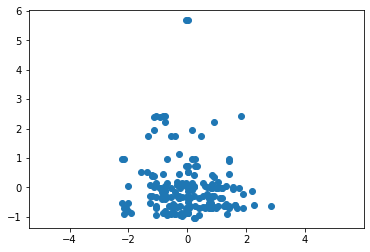

In [ ]:
plt.scatter(X_titanic[:, 3], X_titanic[:,6])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_titanic)
#pca = PCA(n_components=20)
#pca.fit_transform(X_titanic)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[ 0.37821517 -0.09222055 -0.52826953 -0.08866624  0.11093817  0.06477609
   0.17638809  0.112426   -0.46226545  0.52826953 -0.09222055]
 [ 0.07602604  0.59823226 -0.14537323 -0.3131219  -0.06991344  0.05698482
  -0.25302114 -0.25213408  0.04917144  0.14537323  0.59823226]]


In [ ]:
print(pca.explained_variance_)

[3.16506596 2.45405649]


In [ ]:
print(pca.explained_variance_ratio_)

[0.28615232 0.22187024]


In [ ]:
print(pca.mean_)

[-3.90408097e-17  2.92806072e-17 -1.97644099e-16  1.95204048e-17
 -6.34413157e-17 -7.80816193e-17  2.56205313e-16  1.95204048e-17
 -4.63609615e-17  9.76020241e-18  2.92806072e-17]


In [ ]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.scatter(ind, vals)
    ax.plot(ind, vals, color='r')
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

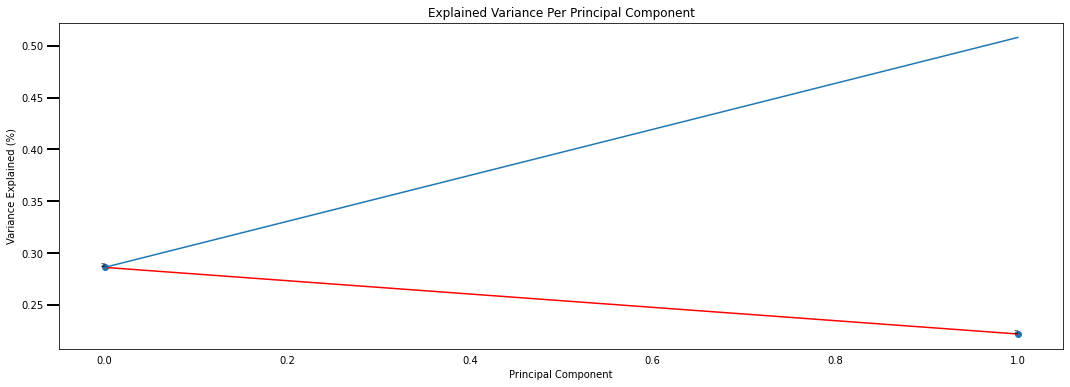

In [ ]:
scree_plot(pca)

#plotando os componentes principais da base titanic

In [ ]:
features = titanic[continuous_features].columns
features[1:11]

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who',
       'female', 'classed'],
      dtype='object')

In [ ]:
#df = px.data.iris()
features = features[1:11]
X = X_titanic[:, 1:11]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=X_titanic[:,0])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

#Saving into CSV

In [ ]:
# Saving dataframe to CSV
titanic.to_csv('preprocessed_titanic.csv', index=False)

#Iris Dataset - PCA na base IRIS

In [ ]:
iris = sns.load_dataset('iris')
iris = iris.iloc[:, 0:4]
iris.head()





,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=3)
pca_iris.fit(iris)
print(pca_iris.explained_variance_)

[4.22824171 0.24267075 0.0782095 ]


In [ ]:
print(pca_iris.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261]


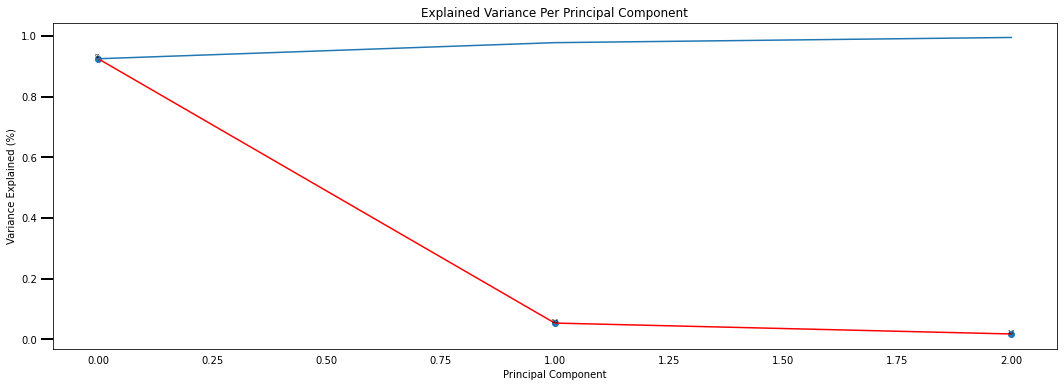

In [ ]:
scree_plot(pca_iris)

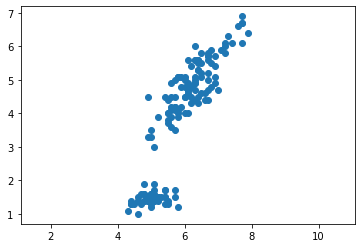

In [ ]:
plt.scatter(iris.iloc[:, 0], iris.iloc[:,2])
plt.axis('equal');
 

#Plotando os componentes principais na base IRIS

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()